# Load and explore the data

## Import libraries

In [1]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## Load the data

In [2]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/refs/heads/main/EdGap_data.xlsx',
    dtype={'NCESSCH School ID': object}
)

C:\Users\ahria\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
school_information= pd.read_csv("https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=1", encoding='unicode_escape',low_memory= False)
#just takes longer because of the low memory thing

## Explore the contents of the data sets

##### Start by looking at the head of each data frame.

This will let us see the names of the columns and a few example values for each column.

In [4]:
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

##### Examine more rows

In [5]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [6]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

##### Are the columns are the same?

In [7]:
edgap.shape

(7986, 7)

school_information.shape

Findings:
1. The school information dataset is much larger than EdGap so there must be missing schools
2. There are missing values in each dataset
3. Each dataset is in a tidy or long format
4. School ID is an object in EdGap and a float in School Information

## Preliminary Graphing

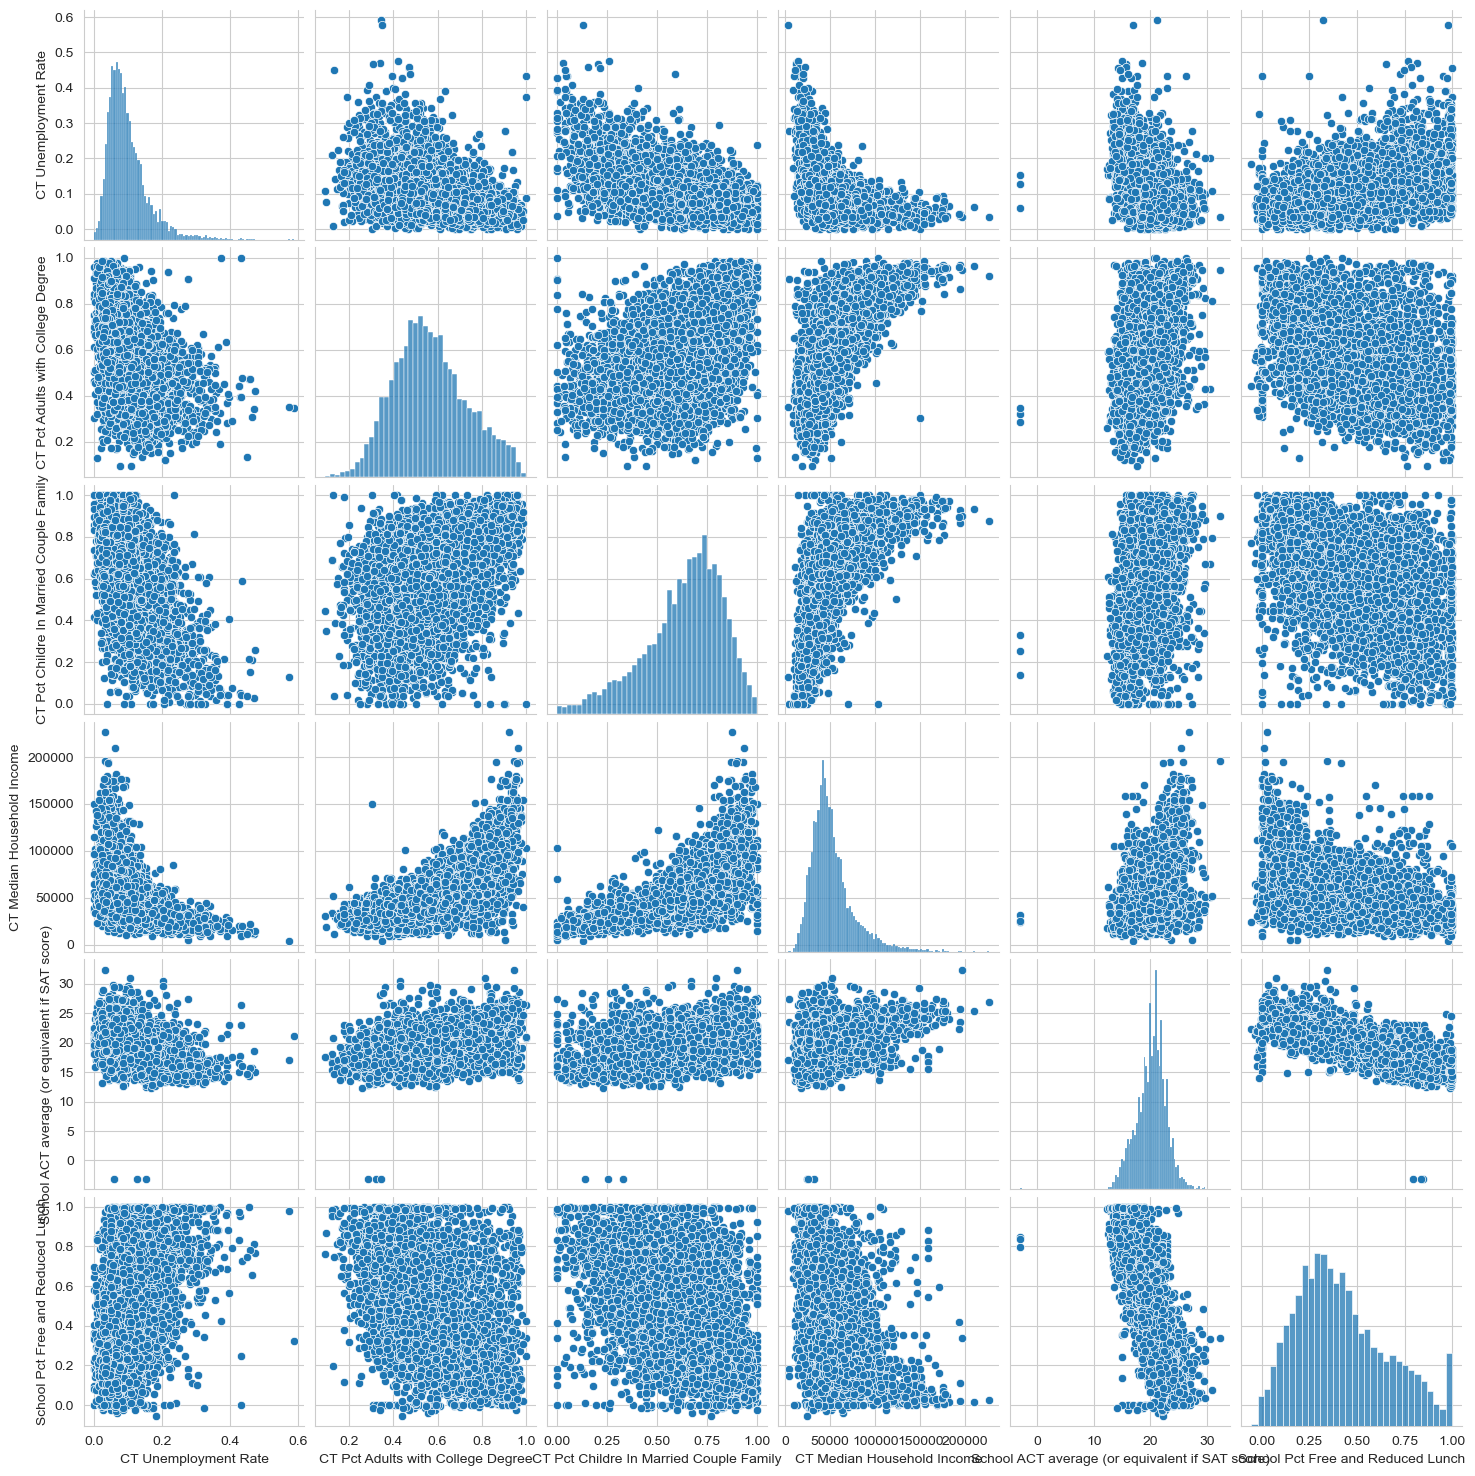

In [8]:
sns.pairplot(
    edgap.drop(columns="NCESSCH School ID")
);
plt.show()

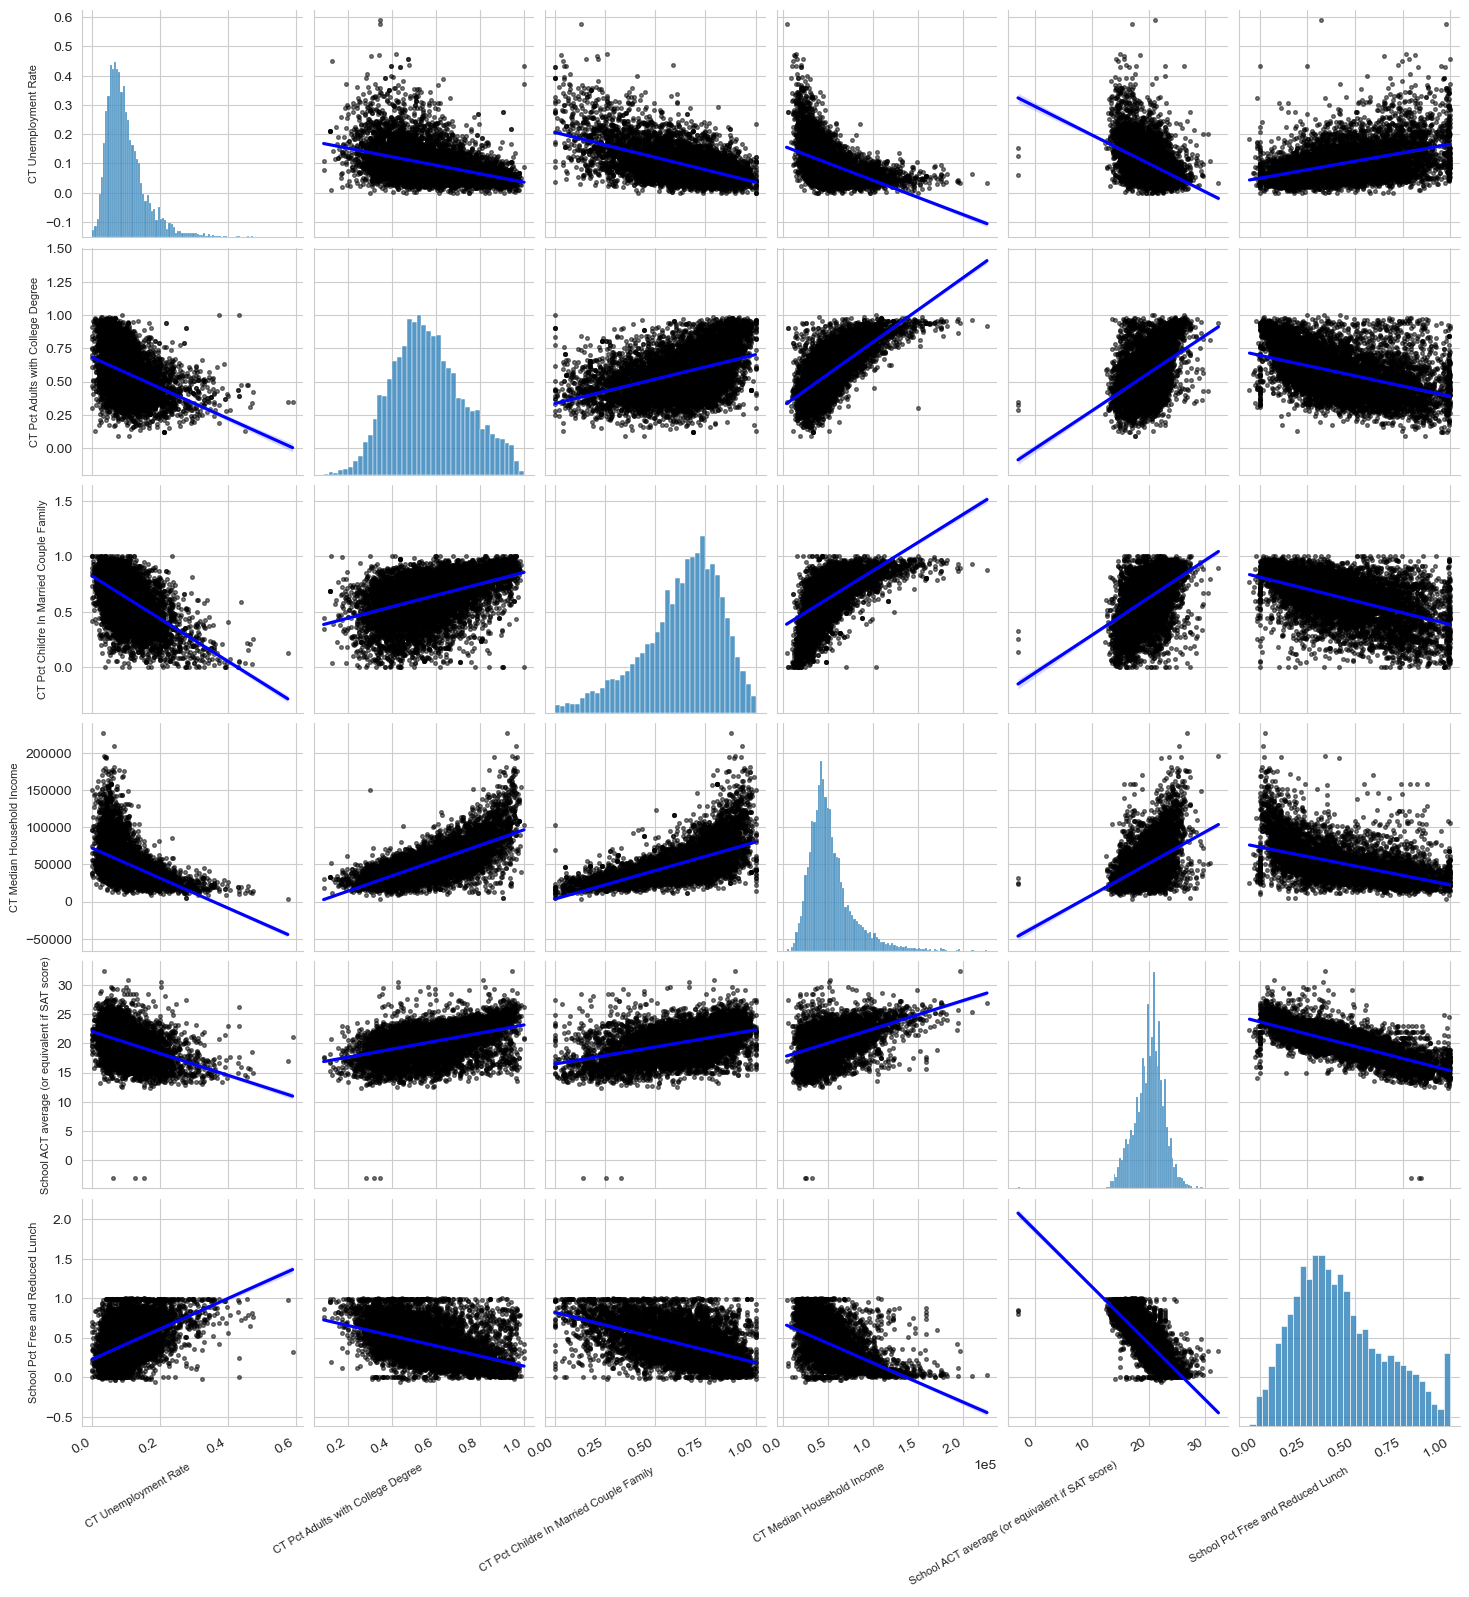

In [9]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    kind = "reg",
    plot_kws={
        "line_kws": {"color":"blue"},
        "scatter_kws": {"alpha":0.5, "color":"k","s":7},
        
    }
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style= 'sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

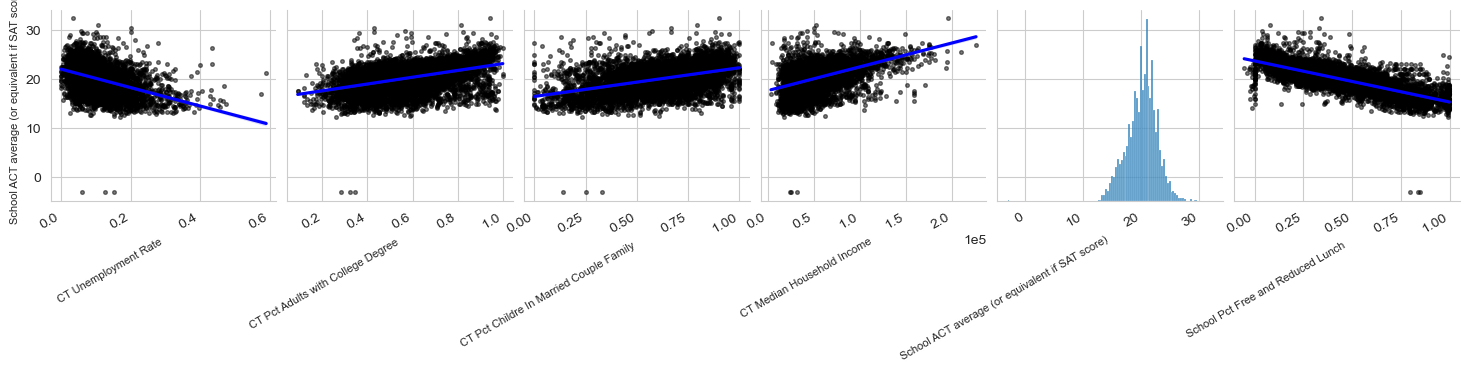

In [10]:
fig = sns.pairplot(
    edgap.drop(columns="NCESSCH School ID"),
    y_vars=['School ACT average (or equivalent if SAT score)'],
    kind = "reg",
    plot_kws={
        "line_kws": {"color":"blue"},
        "scatter_kws": {"alpha":0.5, "color":"k","s":7},
        
    }
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style= 'sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

### Data Preparation

#### Select relevant subset of data

We only need year, school identity, location, and school type information:
SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT

In [11]:
school_information = school_information[[
'SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']
]

In [12]:
school_information = school_information.rename(
    columns={
        'NCESSCH': 'id',
        'SCHOOL_YEAR': "year" ,
        'LSTATE': "state",
        'LZIP': 'zip_code',
        'SCH_TYPE_TEXT': "school_type",
        'LEVEL':"school_level",
        'CHARTER_TEXT':"charter",     
    }
)

In [13]:
school_information.columns

Index(['year', 'id', 'state', 'zip_code', 'school_type', 'school_level',
       'charter'],
      dtype='object')

In [14]:
edgap.columns

Index(['NCESSCH School ID', 'CT Unemployment Rate',
       'CT Pct Adults with College Degree',
       'CT Pct Childre In Married Couple Family', 'CT Median Household Income',
       'School ACT average (or equivalent if SAT score)',
       'School Pct Free and Reduced Lunch'],
      dtype='object')

In [15]:
edgap = edgap.rename(
    columns={
        'NCESSCH School ID': 'id',
        'CT Pct Adults with College Degree': "percent_college" ,
        'CT Unemployment Rate': "rate_unemployment",
        'CT Pct Childre In Married Couple Family': 'percent_married',
        'CT Median Household Income': "median_income",
        'School ACT average (or equivalent if SAT score)':"average_act",
        'School Pct Free and Reduced Lunch':"percent_lunch",     
    }
)

In [16]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [17]:
school_information.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

## Join dataframes

We want to use the identity of the school (NCESSCH) as a key however it is stored as different datatypes in the original frames. So we will cast the id column in school_information to an "object"

In [18]:
school_information['id']= school_information['id'].astype('object')

In [19]:
df= edgap.merge(
    school_information,
    how='left',
    on='id'
)

## Summary

1. We joined the datasets with id as a key
2. id was cas to have the saem data type as the key in each dataset
3. We used a left join to keep all the EdGap data

## Quality Control

Compute descriptive statistics

In [23]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [24]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

In [25]:
df.select_dtypes(include=["number"]).agg(['min','max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

Set out of range values to Nan using np.nan

In [26]:
df.loc[df['percent_lunch']<0, 'percent_lunch']= np.nan
df.loc[df['average_act']<1, 'average_act']= np.nan

Check the types, levels, and charter status of schools

In [29]:
df['school_type'].value_counts()
#df['charter'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [28]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

Keep only high schools and check for duplicated rows

In [30]:
df= df.loc[df['school_level']== 'High']
df.duplicated().sum()

np.int64(0)

### Identify missing values
How many of each variable are missing?

In [33]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

In [34]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

What states do we have information from?

In [35]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [39]:
df['state'].nunique()

20

Plot the results on a map

In [40]:
import plotly.offline as po
import plotly.graph_objs as pg

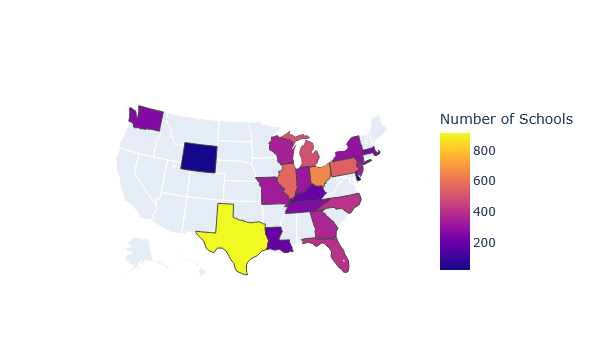

In [41]:
layout = dict(
    geo={"scope":"usa"}, coloraxis_colorbar=dict(title="Number of Schools"))
data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df['state'].value_counts().values,
    coloraxis= "coloraxis"
)

x = pg.Figure(data=[data], layout= layout)
po.iplot(x)

We are missing a large amount of data due to omission. This is not evidents from the NaN values alone. We could suplement with public records but we are not doing that

Drop the rows where the average ACT score is missing

In [42]:
df= df.dropna(subset=['average_act'])

In [43]:
df.isna().sum().to_frame(name="Number of Missing Values")

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Dropping all of the NaNs for any socioeconomic variables will affect the analysis. Therefore we are not dropping those rows and will be imputing missing values instead

### Summary
1. We set out of range values to NaN and will impute them
2. We kept only high schools
3. We removed schools where we do not have the ACT scores
4. Many schoolsare missing from the data by omission.
5. We will impute missinng values of socioeconomic variables

## Data Imputation

Define the predictor variables to be rate_unemployment, percent_college, percent_marries, median_income, percent_lunch, state, and charter

In [45]:
predictor_variables= [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state',
    'charter'
]

Use the iterative imputer to replace missing values in the columns corresponding to predicor variables in the analysis.

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
imputer = IterativeImputer()

In [51]:
df

id  rate_unemployment  percent_college  percent_married  \
0     100001600143           0.117962         0.445283         0.346495   
1     100008000024           0.063984         0.662765         0.767619   
2     100008000225           0.056460         0.701864         0.713090   
3     100017000029           0.044739         0.692062         0.641283   
4     100018000040           0.077014         0.640060         0.834402   
...            ...                ...              ...              ...   
7981  560530200294           0.034549         0.590780         0.720077   
7982  560569000311           0.069538         0.633860         0.808841   
7983  560569500360           0.035159         0.764566         0.776570   
7984  560576200324           0.063877         0.670532         0.879324   
7985  560583000335           0.033553         0.736511         0.821128   

      median_income  average_act  percent_lunch       year state zip_code  \
0           42820.0    20.433455       0.066901  2016-2017    DE    19804   
1           89320.0    19.498168       0.112412  2016-2017    DE    19709   
2           84140.0    19.554335       0.096816  2016-2017    DE    19709   
3           56500.0    17.737485       0.296960  2016-2017    DE    19958   
4           54015.0    18.245421       0.262641  2016-2017    DE    19934   
...             ...          ...            ...        ...   ...      ...   
7981        64891.0    18.500000       0.232156  2016-2017    WY    82901   
7982        44603.0    22.300000       0.083871  2016-2017    WY    82833   
7983        44896.0    21.500000       0.184829  2016-2017    WY    82801   
7984        92134.0    19.700000       0.112583  2016-2017    WY    82935   
7985        73849.0    21.800000       0.163701  2016-2017    WY    83001   

         school_type school_level charter  
0     Regular School         High     Yes  
1     Regular School         High      No  
2     Regular School         High      No  
3     Regular School         High      No  
4     Regular School         High      No  
...              ...          ...     ...  
7981  Regular School         High      No  
7982  Regular School         High      No  
7983  Regular School         High      No  
7984  Regular School         High      No  
7985  Regular School         High      No  

[7227 rows x 13 columns]

Define the columns you want ot use in the imputation process

In [60]:
numerical_predictors= df[predictor_variables].select_dtypes(include='number').columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fill the imputer

In [61]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Impute the missing values in the training data

In [63]:
df.loc[:, numerical_predictors]= imputer.transform(df.loc[:, numerical_predictors])

Check for missing values

In [65]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

Export the clean data set

In [68]:
from pathlib import Path

In [75]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig',
    index=False
)

### Exploratory Data Analysis

In [76]:
df.columns

Index(['id', 'rate_unemployment', 'percent_college', 'percent_married',
       'median_income', 'average_act', 'percent_lunch', 'year', 'state',
       'zip_code', 'school_type', 'school_level', 'charter'],
      dtype='object')

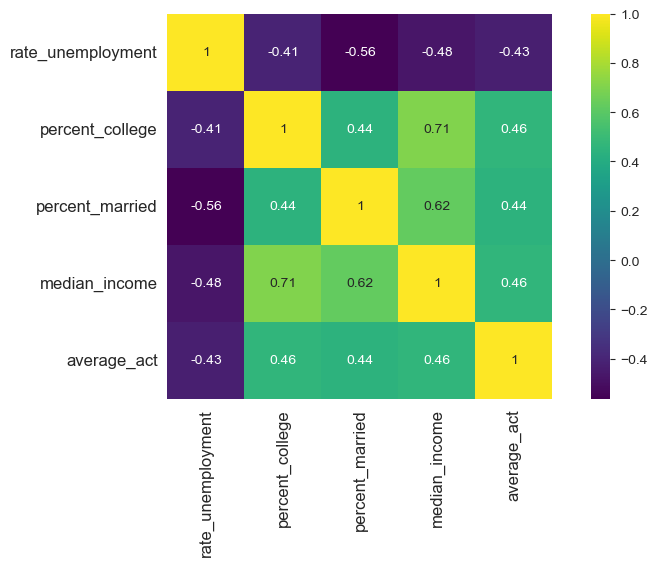

In [79]:
predictor_variables= [
    'rate_unemployment',
    'percent_college',
    'percent_married',
    'median_income'#,
    #'average_act',
    #'reduced_lunch'
]
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors+["average_act"]].corr()

plt.figure(figsize=(10,5))

sns.heatmap(
    corr_matrix, vmax=1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.show()

In [80]:
df.isna().sum()

id                   0
rate_unemployment    0
percent_college      0
percent_married      0
median_income        0
average_act          0
percent_lunch        0
year                 0
state                0
zip_code             0
school_type          0
school_level         0
charter              0
dtype: int64

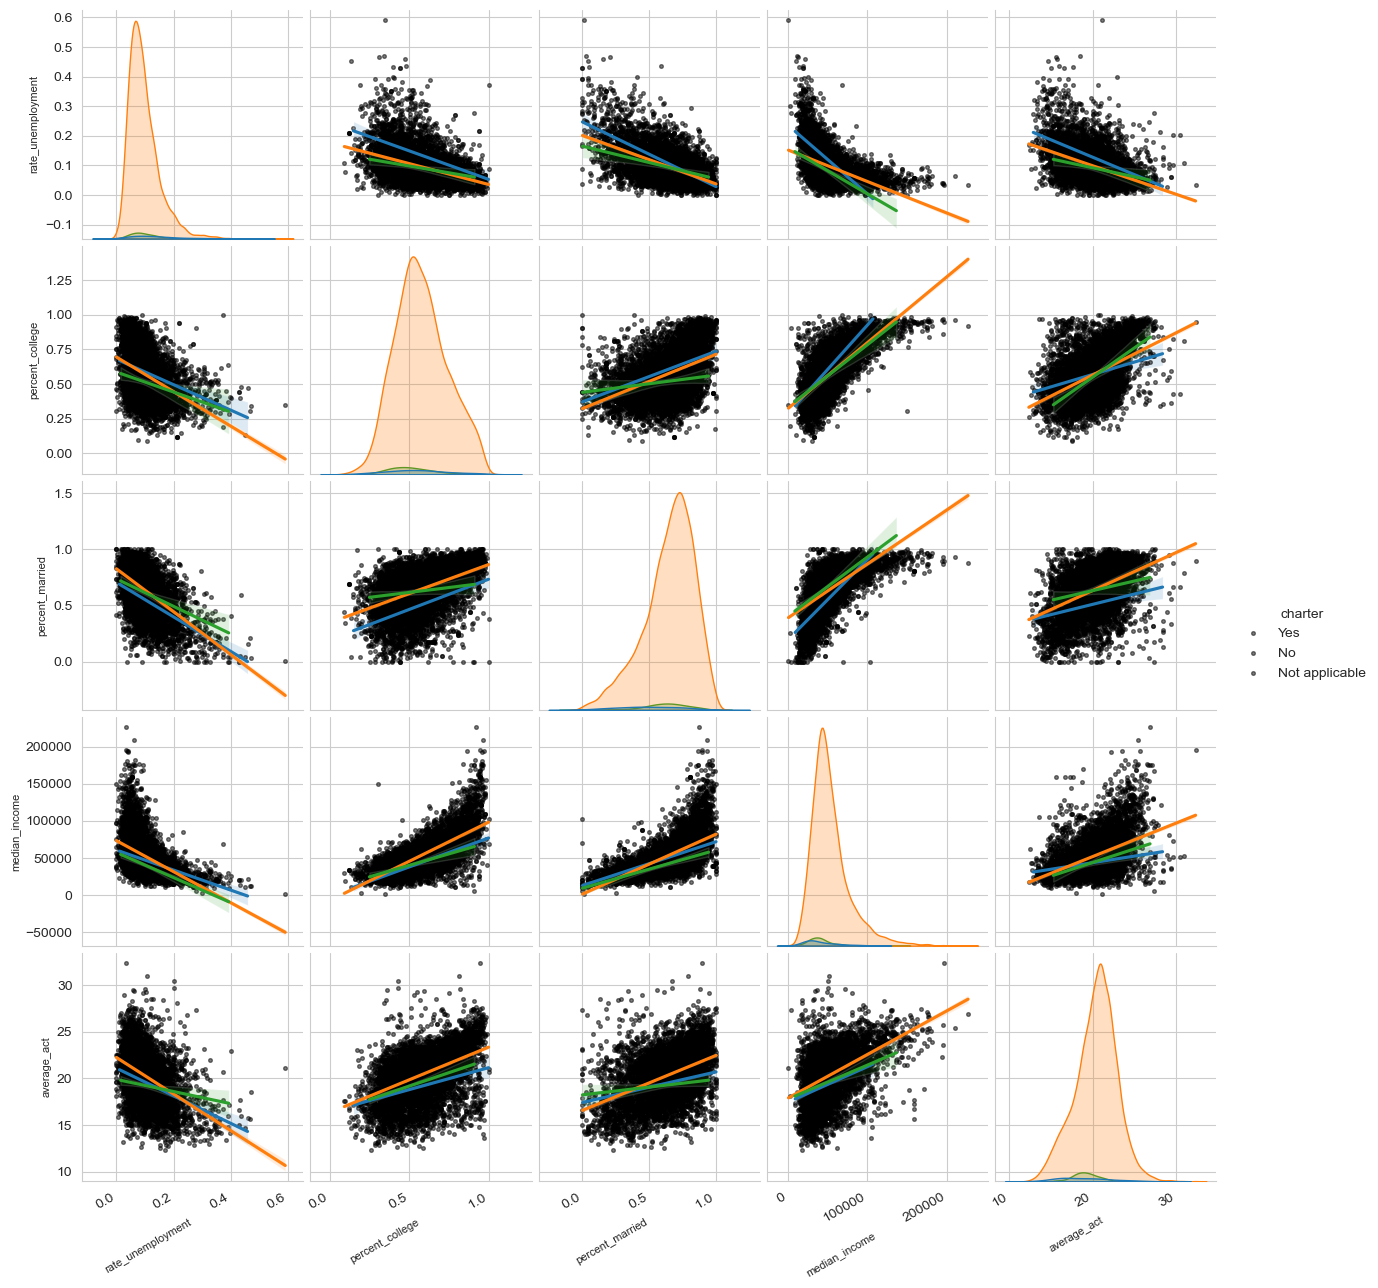

In [82]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ["average_act"],
    hue= "charter",
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color":"k", "s":7},
             },
)
for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation =30, ha= 'right')
    ax.set_ylabel(ax.get_ylabel(), fontsize= 8)

    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

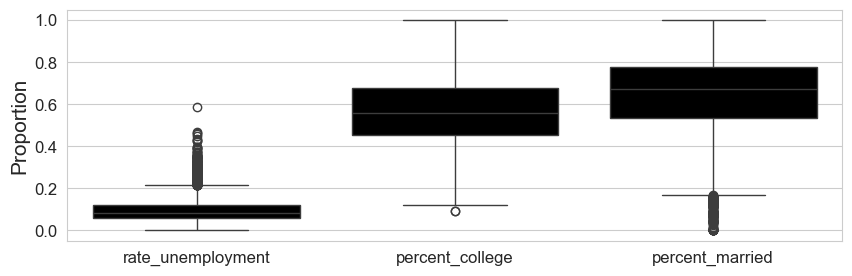

In [85]:
plt.figure(figsize =(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize =15)

plt.tick_params(labelsize =12)

plt.show()

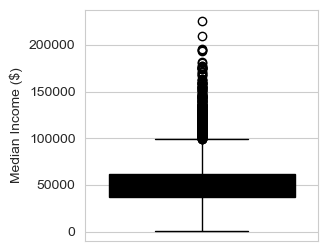

In [86]:
plt.figure(figsize=(3,3))
sns.boxplot(data=df, y="median_income",color='k')
plt.ylabel('Median Income ($)')
plt.show()

## Summary

1. Numerical predictors are related to average_act. The relationships are roughly linear
2. The numerical predictors are correlated wiht each other, suggesting that not all predicotrs will be necessary
3. Some variables have skewed distributions, suggesting that transformations of input variables might be useful
4. There are outliers in rate_unemployment, percent_college, percent_married and median_income. none of these are obviously incorrect values; they probably reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.
5. The relationships are similar across charter and non-hcarter schools, but might be significantly different.